# Using data
https://github.com/sonlam1102/vihsd/blame/main/data/vihsd.zip


In [ ]:
pip install pyvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 29.9 MB/s eta 0:00:00


In [ ]:
!mkdir -p vncorenlp/models/wordsegmenter
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
!wget https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/wordsegmenter.rdr
!mv VnCoreNLP-1.1.1.jar vncorenlp/
!mv vi-vocab vncorenlp/models/wordsegmenter/
!mv wordsegmenter.rdr vncorenlp/models/wordsegmenter/


--2023-12-24 11:20:47--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/VnCoreNLP-1.1.1.jar
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 27412575 (26M) [application/octet-stream]
Saving to: ‘VnCoreNLP-1.1.1.jar’

VnCoreNLP-1.1.1.jar 100%[===================>]  26.14M  --.-KB/s    in 0.1s    

2023-12-24 11:20:47 (251 MB/s) - ‘VnCoreNLP-1.1.1.jar’ saved [27412575/27412575]

--2023-12-24 11:20:47--  https://raw.githubusercontent.com/vncorenlp/VnCoreNLP/master/models/wordsegmenter/vi-vocab
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting respon

# Load the data and preprocessing

In [ ]:
!wget https://github.com/sonlam1102/vihsd/raw/main/data/vihsd.zip


--2023-12-24 11:20:48--  https://github.com/sonlam1102/vihsd/raw/main/data/vihsd.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sonlam1102/vihsd/main/data/vihsd.zip [following]
--2023-12-24 11:20:49--  https://raw.githubusercontent.com/sonlam1102/vihsd/main/data/vihsd.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 918842 (897K) [application/zip]
Saving to: ‘vihsd.zip’

vihsd.zip           100%[===================>] 897.31K  --.-KB/s    in 0.03s   

2023-12-24 11:20:49 (30.1 MB/s) - ‘vihsd.zip’ saved [918842/918842]



In [ ]:
import zipfile
import os


# Path to the zip file
data_path = 'vihsd.zip'

# Directory to extract the contents into
extracted_path = 'extracted_data/'

# Create a directory if it doesn't exist
os.makedirs(extracted_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(data_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

# List the contents of the extracted directory
extracted_files = os.listdir(extracted_path)

In [ ]:
import pandas as pd
train_data = pd.read_csv("/content/extracted_data/vihsd/train.csv", index_col=False)
dev_data = pd.read_csv("/content/extracted_data/vihsd/dev.csv", index_col=False)
test_data = pd.read_csv("/content/extracted_data/vihsd/test.csv", index_col=False)


train_data.dropna(inplace=True)
dev_data.dropna(inplace=True)
test_data.dropna(inplace=True)

combined_test_dev = pd.concat([test_data, dev_data], ignore_index=True)


print(len(train_data))
print(len(dev_data))
print(len(test_data))
print(len(combined_test_dev))



24046
2672
6680
9352


In [ ]:
train_data.head(20)

,free_text,label_id
0,Em được làm fan cứng luôn rồi nè ❤️ reaction q...,0
1,Đúng là bọn mắt híp lò xo thụt :))) bên việt n...,2
2,Đậu Văn Cường giờ giống thằng sida hơn à,0
3,CÔN ĐỒ CỤC SÚC VÔ NHÂN TÍNH ĐỀ NGHI VN. NHÀ NƯ...,2
4,Từ lý thuyết đến thực hành là cả 1 câu chuyện ...,0
5,Coronavirus is manmade,0
6,Đố chúng m nhận ra ai,0
7,Lúp lúp như chó .,1
8,🥰🥰🥰,0
9,"Thế mà mình nói mấy thằng bắc kì, bọn đó lại b...",2


#label is : ["clean","offensive","hate"]

#LETS DO SOME EDA

In [ ]:
import plotly.express as px
import plotly.offline as pyo


sentiment_counts = train_data['label_id'].value_counts()

fig = px.bar(x={0:'Clean', 1:'Offensive', 2:'Hate'}, y = sentiment_counts.values,
            color=sentiment_counts.index,
            color_discrete_sequence =  px.colors.qualitative.Dark24,
             title='<b>Sentiments Counts')


fig.update_layout(title='Sentiments Counts',
                  xaxis_title='Sentiment',
                  yaxis_title='Counts',
                  template='plotly_dark')

# Show the bar chart
fig.show()


In [ ]:
#data is not balance, so we have to upsample the train
from sklearn.utils import resample
import matplotlib.pyplot as plt

clean_messages = train_data[train_data['label_id'] == 0]
offensive_messages = train_data[train_data['label_id'] == 1]
harm_messages = train_data[train_data['label_id'] == 2]

offensize_messages_up = resample(offensive_messages,
                              n_samples = len(clean_messages),
                              random_state = 42)
harm_messages_up = resample(harm_messages,
                              n_samples = len(clean_messages),
                              random_state = 42)

upsampled_train = pd.concat([clean_messages, offensize_messages_up, harm_messages_up])
print(upsampled_train.shape)


sentiment_counts = upsampled_train['label_id'].value_counts()

fig = px.bar(x={0:'Clean', 1:'Offensive', 2:'Hate'}, y = sentiment_counts.values,
            color=sentiment_counts.index,
            color_discrete_sequence =  px.colors.qualitative.Dark24,
             title='<b>Sentiments Counts')


fig.update_layout(title='Sentiments Counts',
                  xaxis_title='Sentiment',
                  yaxis_title='Counts',
                  template='plotly_dark')

# Show the bar chart
fig.show()


(59655, 2)


In [ ]:
!wget https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords-dash.txt

--2023-12-24 11:20:52--  https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords-dash.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20475 (20K) [text/plain]
Saving to: ‘vietnamese-stopwords-dash.txt’

vietnamese-stopword 100%[===================>]  20.00K  --.-KB/s    in 0.001s  

2023-12-24 11:20:52 (32.4 MB/s) - ‘vietnamese-stopwords-dash.txt’ saved [20475/20475]



In [ ]:
#get stopword
from pyvi.ViTokenizer import ViTokenizer

STOPWORDS = 'vietnamese-stopwords-dash.txt'
with open(STOPWORDS, "r") as ins:
    stopwords = []
    for line in ins:
        dd = line.strip('\n')
        stopwords.append(dd)
    stopwords = set(stopwords)



In [ ]:
from bs4 import BeautifulSoup
import re
from wordcloud import WordCloud
#clean unncessary character




def generate_wordcloud(text,Title):
    all_text = " ".join(text)
    wordcloud = WordCloud(width=800,
                          height=400,
                          stopwords=stopwords,
                          background_color='black').generate(all_text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(Title)
    plt.show()





In [ ]:

clean = upsampled_train[upsampled_train['label_id']==0]['free_text'].tolist()



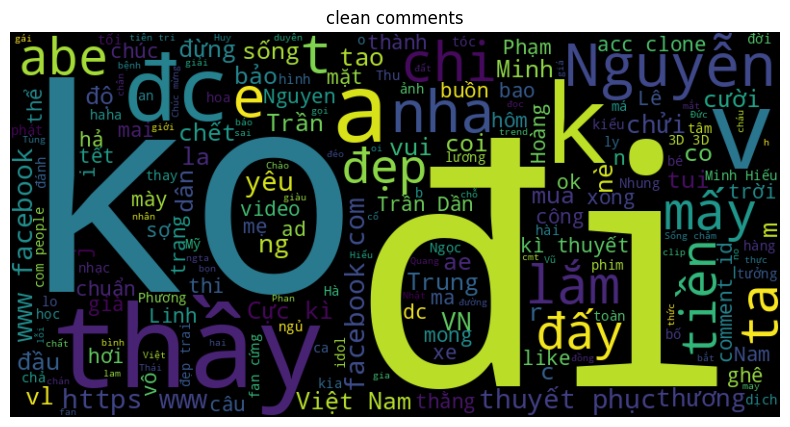

In [ ]:
generate_wordcloud(clean,'clean comments')


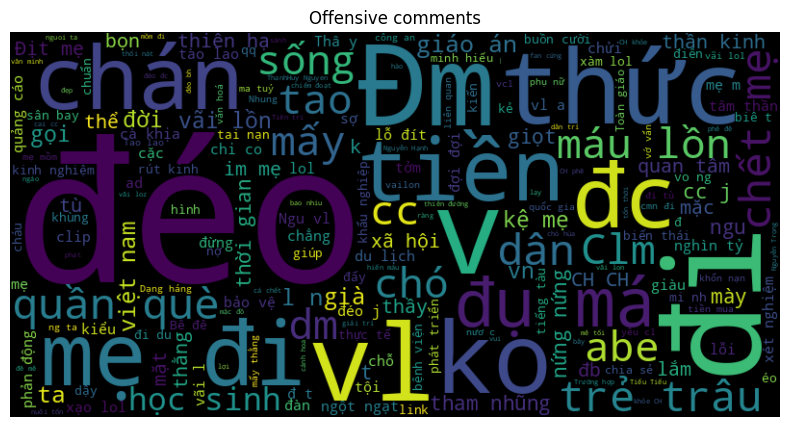

In [ ]:
offensive = upsampled_train[upsampled_train['label_id']==1]['free_text'].tolist()
generate_wordcloud(offensive,'Offensive comments')


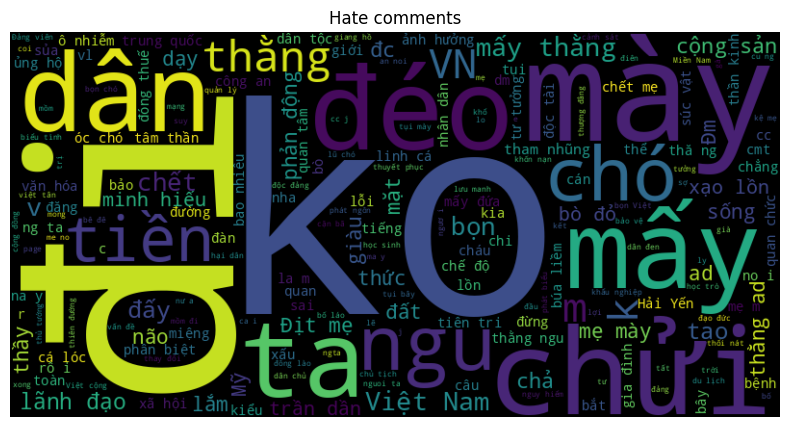

In [ ]:
hate = upsampled_train[upsampled_train['label_id']==2]['free_text'].tolist()
generate_wordcloud(hate,'Hate comments')


#SO now we should do some preprocess with data, like removing emojis, filterout stopwords and tokenizer

In [ ]:
pip install demoji


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 755.5 kB/s eta 0:00:00


In [ ]:
from pyvi.ViTokenizer import ViTokenizer
import demoji

# def deEmojify(text):
#     return demoji.replace(text, '')

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)


def filter_stop_words(train_sentences, stop_words):
    new_sent = [word for word in train_sentences.split() if word not in stop_words]
    train_sentences = ' '.join(new_sent)

    return train_sentences


# def preprocess(text, lowercased = True):
#     text = filter_stop_words(text, stopwords)
#     text = deEmojify(text)
#     text = text.lower() if lowercased else text

#     return text.split(' ')

### We should build a vocab dictionary

In [ ]:
pip install -U portalocker>=2.0.0


In [ ]:
from torchtext.vocab import build_vocab_from_iterator


def build_token(file):
  for index, row in file.iterrows():
    yield preprocess(row['free_text'])

vocab = build_vocab_from_iterator(build_token(upsampled_train), specials=['<unk>'])

vocab.set_default_index(vocab['<unk>'])

In [ ]:
print(vocab)

Vocab()


In [ ]:
sentence = 'Cà phê muối không ngon lắm'
vocab(preprocess(sentence))

[478, 1692, 9063, 426, 44]

#Nah we dont need the vocab dictionary

#TOKENIZER

In [ ]:
#apply deemoji

upsampled_train['free_text'] = upsampled_train['free_text'].apply(lambda x: deEmojify(x))

# Applying deEmojify() function to 'free_text' column in combined_test_dev DataFrame
combined_test_dev['free_text'] = combined_test_dev['free_text'].apply(lambda x: deEmojify(x))

upsampled_train['free_text'].head(20)

0     Em được làm fan cứng luôn rồi nè ❤️ reaction q...
2              Đậu Văn Cường giờ giống thằng sida hơn à
4     Từ lý thuyết đến thực hành là cả 1 câu chuyện ...
5                                Coronavirus is manmade
6                                 Đố chúng m nhận ra ai
8                                                   🥰🥰🥰
10        Được anh ưi, lâu rồi không nghe phúc du rap 🤣
11                        Cắt cho trẻ trâu bớt thui mà 
12              Nghe rất vô lí nhưng cực kì thuyết phục
13            chán ghê hong có pé 2 mới máu được, hâhha
14                                     Sao t gửi đc bây
15    thế đấy. làm j bọn nó. bọn nó có quyền nên làm...
17                                         Thuong wa di
20                               Bamtp chạy ngay ddi:))
21        Cứ đăng cái ảnh 2 bố con là y như rằng bị đổi
22    Dàn Táo năm nay làm chương trình TÁO QUÂN VI H...
24    Đời vô thường lắm..sống phải tu tâm tích đức c...
25    có ai biết làm cách nào để tìm lại được, đ

In [ ]:
#clean emojis again
import demoji


# Function to remove emojis
def remove_emojis(text):
    return demoji.replace(text, '')

# Applying remove_emojis() function to 'free_text' column in upsampled_train DataFrame
upsampled_train['free_text'] = upsampled_train['free_text'].apply(lambda x: remove_emojis(x))

# Applying remove_emojis() function to 'free_text' column in combined_test_dev DataFrame
combined_test_dev['free_text'] = combined_test_dev['free_text'].apply(lambda x: remove_emojis(x))



In [ ]:
upsampled_train #emojis are wiped

,free_text,label_id
0,Em được làm fan cứng luôn rồi nè reaction quá...,0
2,Đậu Văn Cường giờ giống thằng sida hơn à,0
4,Từ lý thuyết đến thực hành là cả 1 câu chuyện ...,0
5,Coronavirus is manmade,0
6,Đố chúng m nhận ra ai,0
...,...,...
22440,Cái con này sao xe bắt chó kg bắt nó giùm cái,2
3276,Thầy ba dơ lắm cô ơi,2
3724,Cái miệng cua con bong thuôi này chuoi ngta sẽ...,2
12058,Táng chết cha tụi mày lũ học trò l :)),2


In [ ]:
Text = upsampled_train['free_text']
Target = upsampled_train['label_id']

test_text = combined_test_dev['free_text']
test_target = combined_test_dev['label_id']




In [ ]:
from sklearn.model_selection import train_test_split

x_val, x_test, y_val, y_test = train_test_split(test_text,
                                                    test_target,
                                                    test_size=0.5,
                                                    stratify = test_target)


In [ ]:
# use phobert tokenizer
import torch
from transformers import AutoModel, AutoTokenizer
phobert = AutoModel.from_pretrained("vinai/phobert-base")
tokenizer = AutoTokenizer.from_pretrained("vinai/phobert-base")


config.json:   0%|          | 0.00/557 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/543M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/895k [00:00<?, ?B/s]

bpe.codes:   0%|          | 0.00/1.14M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.13M [00:00<?, ?B/s]

In [ ]:
#apply phobert in training, testing and validation dataset
max_len = 128

X_train_encoded = tokenizer.batch_encode_plus(Text.tolist(),
                                              padding=True,
                                              truncation=True,
                                              max_length = max_len,
                                              return_tensors='tf')

X_val_encoded = tokenizer.batch_encode_plus(x_val.tolist(),
                                              padding=True,
                                              truncation=True,
                                              max_length = max_len,
                                              return_tensors='tf')

X_test_encoded = tokenizer.batch_encode_plus(x_test.tolist(),
                                              padding=True,
                                              truncation=True,
                                              max_length = max_len,
                                              return_tensors='tf')






In [ ]:

k = 0
print('Training Comments -->>',Text[k])
print('\nInput Ids -->>\n',X_train_encoded['input_ids'][k])
print('\nDecoded Ids -->>\n',tokenizer.decode(X_train_encoded['input_ids'][k]))
print('\nAttention Mask -->>\n',X_train_encoded['attention_mask'][k])
print('\nLabels -->>',Text[k])


Training Comments -->> Em được làm fan cứng luôn rồi nè  reaction quá hay quá cute coi mấy giờ này quá hợp lí =]]]

Input Ids -->>
 tf.Tensor(
[    0  1350    11    47  1818  2951   236   182 21091  2938 43230   204
   118   204  5109  3915   774   849   232    23   204  2288 12826 23196
     3     3  2705     2     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1     1     1     1     1
     1     1     1     1     1     1     1     1], shape=(128,), dtype=int32)

Decoded Ids -->>
 <s> Em được làm fan cứng luôn 

In [ ]:
#build a classification model

from transformers import TFBertForSequenceClassification
# Intialize the model
model = TFBertForSequenceClassification.from_pretrained('vinai/phobert-base', num_labels=3)

# model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

You are using a model of type roberta to instantiate a model of type bert. This is not supported for all configurations of models and can yield errors.


tf_model.h5:   0%|          | 0.00/740M [00:00<?, ?B/s]

Some layers from the model checkpoint at vinai/phobert-base were not used when initializing TFBertForSequenceClassification: ['lm_head', 'roberta']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at vinai/phobert-base and are newly initialized: ['classifier', 'bert']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


#Create and Train the model

In [ ]:
import tensorflow as tf

# Compile the model with an appropriate optimizer, loss function, and metrics
optimizer = tf.keras.optimizers.Adam(learning_rate=2e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metric = tf.keras.metrics.SparseCategoricalAccuracy('accuracy')
model.compile(optimizer=optimizer, loss=loss, metrics=[metric])


In [ ]:
history = model.fit(
    [X_train_encoded['input_ids'], X_train_encoded['token_type_ids'], X_train_encoded['attention_mask']],
    Target,
    validation_data=(
      [X_val_encoded['input_ids'], X_val_encoded['token_type_ids'], X_val_encoded['attention_mask']],y_val),
    batch_size=32,
    epochs=3
)

Epoch 1/3
1865/1865 [==============================] - 1673s 864ms/step - loss: 0.6707 - accuracy: 0.7042 - val_loss: 0.7369 - val_accuracy: 0.7100
Epoch 2/3
1865/1865 [==============================] - 1622s 870ms/step - loss: 0.2458 - accuracy: 0.9157 - val_loss: 0.7550 - val_accuracy: 0.7883
Epoch 3/3
1865/1865 [==============================] - 1621s 869ms/step - loss: 0.1369 - accuracy: 0.9562 - val_loss: 0.7152 - val_accuracy: 0.8383


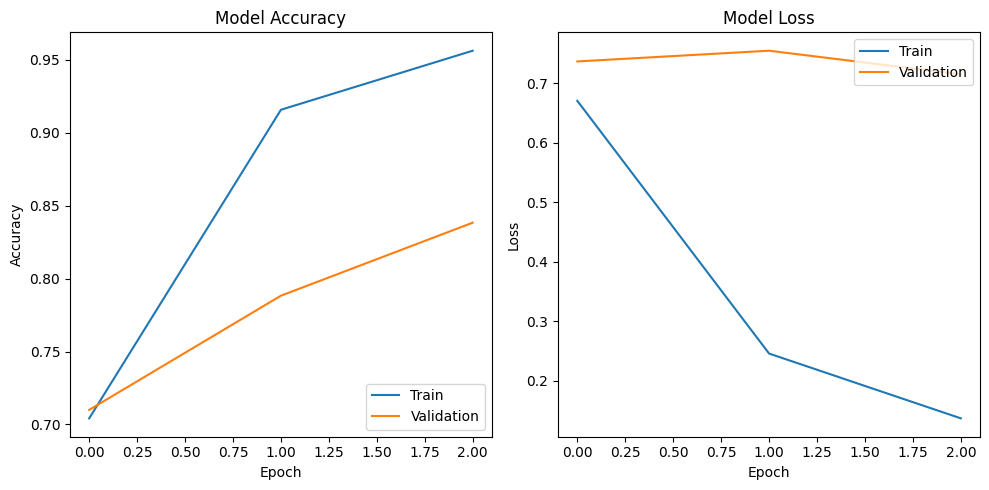

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='lower right')

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
test_loss, test_accuracy = model.evaluate(
    [X_test_encoded['input_ids'], X_test_encoded['token_type_ids'], X_test_encoded['attention_mask']],
    y_test
)
print(f'Test loss: {test_loss}, Test accuracy: {test_accuracy}')

147/147 [==============================] - 43s 295ms/step - loss: 0.7224 - accuracy: 0.8351
Test loss: 0.7223576903343201, Test accuracy: 0.8351154923439026


In [ ]:

path = 'path-to-save'
# Save tokenizer
tokenizer.save_pretrained(path +'/Tokenizer')

# Save model
model.save_pretrained(path +'/Model')


In [ ]:
phobert_tokenizer = AutoTokenizer.from_pretrained(path +'/Tokenizer')

phobert_model = TFBertForSequenceClassification.from_pretrained(path +'/Model')


Some layers from the model checkpoint at path-to-save/Model were not used when initializing TFBertForSequenceClassification: ['dropout_37']
- This IS expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertForSequenceClassification were initialized from the model checkpoint at path-to-save/Model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertForSequenceClassification for predictions without further training.


In [ ]:
#predict the sentiment of test dataset


pred = phobert_model.predict(
    [X_test_encoded['input_ids'], X_test_encoded['token_type_ids'], X_test_encoded['attention_mask']])

# pred is of type TFSequenceClassifierOutput
logits = pred.logits

# Use argmax along the appropriate axis to get the predicted labels
pred_labels = tf.argmax(logits, axis=1)

# Convert the predicted labels to a NumPy array
pred_labels = pred_labels.numpy()

label = {
    0: 'Clean',
    1: 'Offensive',
    2: 'Hate'
}

# Map the predicted labels to their corresponding strings using the label dictionary
pred_labels = [label[i] for i in pred_labels]
Actual = [label[i] for i in y_test]

print('Predicted Label :', pred_labels[:10])
print('Actual Label    :', Actual[:10])


147/147 [==============================] - 48s 287ms/step
Predicted Label : ['Clean', 'Clean', 'Clean', 'Clean', 'Clean', 'Clean', 'Clean', 'Clean', 'Clean', 'Clean']
Actual Label    : ['Clean', 'Clean', 'Hate', 'Clean', 'Clean', 'Clean', 'Clean', 'Clean', 'Clean', 'Clean']


In [ ]:
from sklearn.metrics import classification_report
print("Classification Report: \n", classification_report(Actual, pred_labels))
#this looks bad i dont have time so lets just use the model :)

Classification Report: 
               precision    recall  f1-score   support

       Clean       0.91      0.92      0.92      3869
        Hate       0.48      0.51      0.50       479
   Offensive       0.38      0.33      0.35       328

    accuracy                           0.84      4676
   macro avg       0.59      0.59      0.59      4676
weighted avg       0.83      0.84      0.83      4676



In [ ]:

def Get_sentiment(Review, Tokenizer=phobert_tokenizer, Model=phobert_model):
    # Convert Review to a list if it's not already a list
    if not isinstance(Review, list):
        Review = [Review]

    Input_ids, Token_type_ids, Attention_mask = Tokenizer.batch_encode_plus(Review,
                                                                             padding=True,
                                                                             truncation=True,
                                                                             max_length=128,
                                                                             return_tensors='tf').values()
    prediction = Model.predict([Input_ids, Token_type_ids, Attention_mask])

    # Use argmax along the appropriate axis to get the predicted labels
    pred_labels = tf.argmax(prediction.logits, axis=1)

    # Convert the TensorFlow tensor to a NumPy array and then to a list to get the predicted sentiment labels
    pred_labels = [label[i] for i in pred_labels.numpy().tolist()]
    return pred_labels



In [ ]:
comment = 'tương lai Việt Nam chán vãi lồn ông giáo ạ'
Get_sentiment(comment)

1/1 [==============================] - 7s 7s/step


['Offensive']

In [ ]:
comment = 'địt mẹ lũ gay bóng chó'
Get_sentiment(comment)

1/1 [==============================] - 0s 108ms/step


['Hate']

In [ ]:
comment = 'bạn long của mình cute'
Get_sentiment(comment)

1/1 [==============================] - 0s 134ms/step


['Clean']

In [ ]:
import shutil
import os

folder_path = '/content/path-to-save'

shutil.make_archive('/content/path-to-save', 'zip', folder_path)

#download entire tokenizer and model folder
from google.colab import files
files.download('/content/path-to-save.zip')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>